In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import json

%matplotlib inline

In [21]:
iris = pd.read_csv("../data/iris.csv")
del iris["Id"]
iris.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
39,5.1,3.4,1.5,0.2,Iris-setosa
117,7.7,3.8,6.7,2.2,Iris-virginica
100,6.3,3.3,6.0,2.5,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
73,6.1,2.8,4.7,1.2,Iris-versicolor
9,4.9,3.1,1.5,0.1,Iris-setosa
51,6.4,3.2,4.5,1.5,Iris-versicolor
37,4.9,3.1,1.5,0.1,Iris-setosa
24,4.8,3.4,1.9,0.2,Iris-setosa
87,6.3,2.3,4.4,1.3,Iris-versicolor


In [23]:
iris.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [25]:
species = iris.Species.unique() 
species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

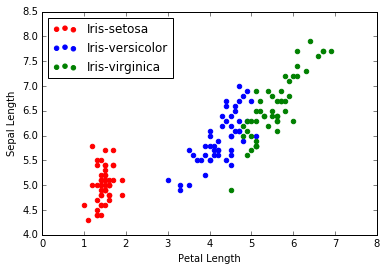

In [30]:
colors = ["red", "blue", "green"]
for i, v in enumerate(species):
    df = iris[iris.Species == v]
    plt.scatter(df["PetalLengthCm"],df["SepalLengthCm"], color = colors[i], label = v)
plt.legend(loc = "upper left")
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")

In [32]:
y = np.where(iris.Species == "Iris-virginica", 1, 0)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

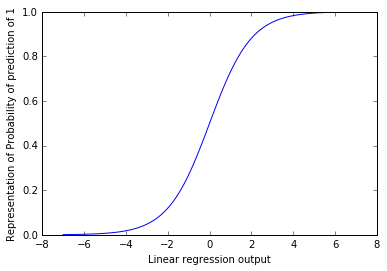

In [68]:
p = np.linspace(-7, 7, 100)
def phi(p):
    return 1 / (1 + np.exp(-p))
plt.plot(p, phi(p))
plt.xlabel("Linear regression output")
plt.ylabel("Representation of Probability of prediction of 1")

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from mlxtend.plotting import plot_decision_regions

In [55]:
X = iris.iloc[:, [0, 2]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
X_train.shape

(105, 2)

In [56]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)
outcome = pd.DataFrame({"actual": y_test,"pred": y_test_pred}) 
outcome["match"] = outcome.actual == outcome.pred
outcome

,actual,pred,match
0,0,0,True
1,0,1,False
2,0,0,True
3,0,0,True
4,0,0,True
5,1,1,True
6,0,0,True
7,0,0,True
8,0,0,True
9,1,1,True


In [57]:
accuracy_score(y_test, y_test_pred)

0.8666666666666667

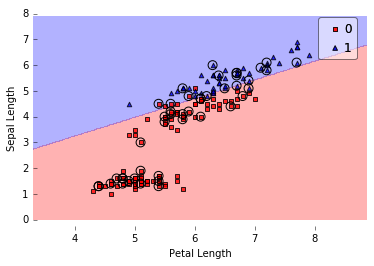

In [61]:
plot_decision_regions(X, y, lr, X_highlight=X_test)
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")

In [63]:
confusion_matrix(y_test, y_test_pred)

array([[27,  3],
       [ 3, 12]])

In [65]:
pd.Series(y_test).value_counts()

0    30
1    15
dtype: int64

In [67]:
(27 + 12) / 45

0.8666666666666667